In [ ]:
!pip install -q tensorflow-gpu==2.0.0-beta1

import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
2.15.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
#carregando os dados
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("x_train.shape:", y_train.shape)

# aqui foi usado flatten pois é o formato que o tensorflow utiliza



170498071/170498071 [==============================] - 5s 0us/step
x_train.shape: (50000, 32, 32, 3)
x_train.shape: (50000,)


In [ ]:
K = len(set(y_train))
print("numero de classes: ",K)

numero de classes:  10


In [ ]:
#construindo o modelo usando API funcional
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation ='softmax')(x)
model = Model(i,x)


In [ ]:
#Compilando e treinando o modelo
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test, y_test), epochs=30 )


Epoch 1/30
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5379 - accuracy: 0.4417 - val_loss: 1.2640 - val_accuracy: 0.5436
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2243 - accuracy: 0.5621 - val_loss: 1.1561 - val_accuracy: 0.5973
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0704 - accuracy: 0.6193 - val_loss: 1.0226 - val_accuracy: 0.6379
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9633 - accuracy: 0.6588 - val_loss: 0.9863 - val_accuracy: 0.6539
Epoch 5/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8681 - accuracy: 0.6906 - val_loss: 0.9174 - val_accuracy: 0.6768
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7856 - accuracy: 0.7227 - val_loss: 0.9093 - val_accuracy: 0.6859
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7161 - accuracy: 0.7442 - val_loss: 0.9196 - val_accuracy

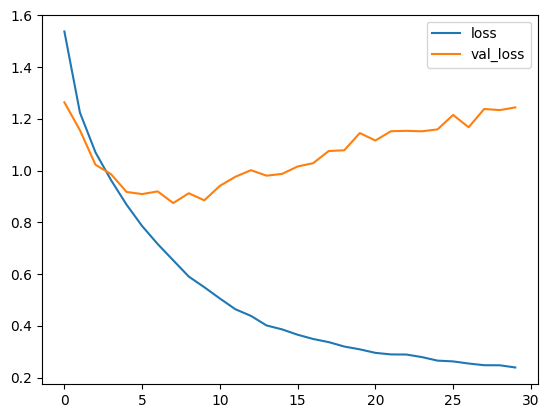

In [ ]:
#Plotagem da função loss ao longo das iterações
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()


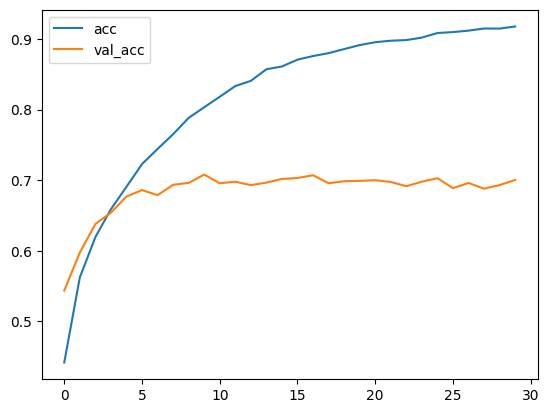

In [ ]:
#Plotando acertividade ao longo das iterações
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Matriz de confusão, sem normalização
[[700  22  73  25  19  10  13  17  84  37]
 [ 18 797   9  14   2   6  14   5  28 107]
 [ 46   7 601  66  80  74  67  32  18   9]
 [ 17   9  55 480  70 219  83  42   9  16]
 [ 16   3  75  54 687  42  50  60  10   3]
 [ 13   4  44 185  61 606  27  41   6  13]
 [  7   5  42  64  55  34 773   8   6   6]
 [ 13   0  33  48  63  59   9 764   3   8]
 [ 50  46  17  16  12  10   4   4 812  29]
 [ 32  81  10  15  12   9   8  23  27 783]]


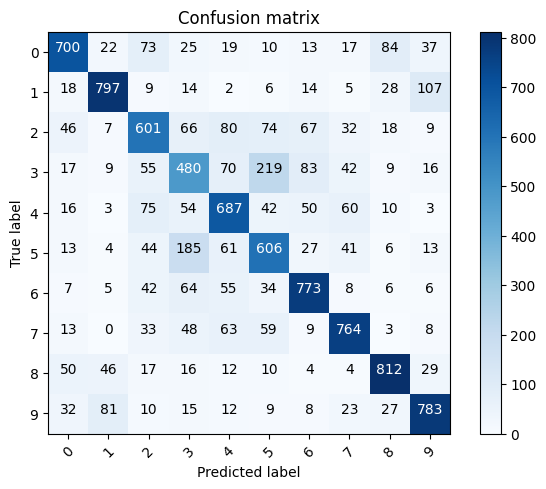

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    print("matriz de confusão normalizada")
  else:
    print('Matriz de confusão, sem normalização')

  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment = "center",
             color = "white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: automobile Predicted: ship')

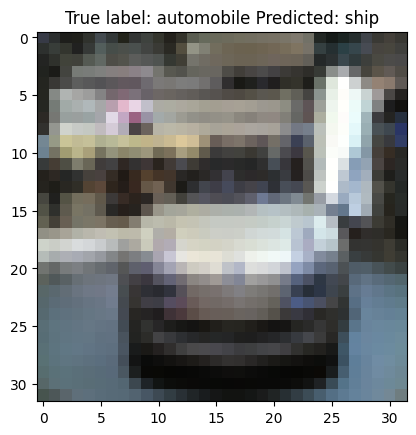

In [ ]:
#Mapeamento de rótulos
labels = '''Airplane
automobile
bird
cat
deer
dog
frog
morse
ship
truck
'''.split()

#Mostrando exemplos mal classificados
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

